In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from uncertainties import ufloat
import uncertainties.unumpy as unp

26
26
a = 1.215 ± 0.256
b = 9567.924 ± 125.414


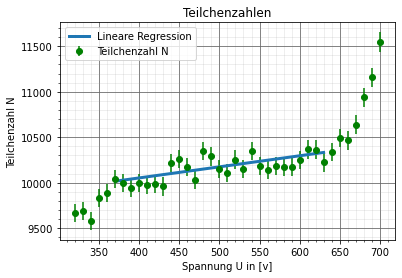

In [3]:
U=np.genfromtxt('Kennlinie.dat', usecols=(0)) #Daten zur Spannung einlesen
Nr=np.genfromtxt('Kennlinie.dat', usecols=(1)) # Rohdaten zur Teilchenzahl einlesen
Nf=np.sqrt(Nr) #Poissonfehler berechnen
X=[0]
N=X*len(Nr)
i=0
while i<len(Nr):
    N[i]=ufloat(Nr[i],Nf[i])
    i=i+1

c=5
d=31
j=0

Nfit=X*(d-c)
while j<(d-c):
    k=j+c
    Nfit[j]=Nr[k]
    j=j+1

y=range(360,620,10)
print(len(Nfit))
print(len(y))
params, covariance_matrix = np.polyfit(y,Nfit , deg=1, cov=True)

errors = np.sqrt(np.diag(covariance_matrix))

for name, value, error in zip('ab', params, errors):
    print(f'{name} = {value:.3f} ± {error:.3f}')
x_plot = np.linspace(U[c], U[d])

plt.plot(
    x_plot,
    params[0] * x_plot + params[1],
    label='Lineare Regression',
    linewidth=3,
)

plt.errorbar(U ,Nr, yerr=Nf, fmt='go', label='Teilchenzahl N')
plt.title('Teilchenzahlen')
plt.xlabel('Spannung U in [v]')
plt.ylabel('Teilchenzahl N')
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.legend(loc='best')
plt.savefig("kennlinie.pdf")


In [10]:
#Berechnung der Steigung in %
a=ufloat(1.215,0.256)
b=ufloat(9567.924,125.414)
x1=370
x2=470
deltax=x2-x1
fx1=a*x1+b
fx2=a*x2+b
deltaf=fx2-fx1
steigung=deltaf/deltax
print("f(x1) ",fx1)
print("f(x2) ",fx2)
print("x1 ",x1)
print("x2 ",x2)
print("Steigung in % =",steigung)

f(x1)  (1.002+/-0.016)e+04
f(x2)  (1.014+/-0.017)e+04
x1  370
x2  470
Steigung in % = 1.22+/-0.26


In [18]:
#bestimmung der Totzeit
N1r=96041/120
N1f=np.sqrt(N1r)
N1=ufloat(N1r,N1f)

N12r=158479/120
N12f=np.sqrt(N12r)
N12=ufloat(N12r,N12f)

N2r=76518/120
N2f=np.sqrt(N2r)
N2=ufloat(N2r,N2f)

T=(N1+N2-N12)/(2*N1*N2)
print("Totzeit T =",T)

Totzeit T = 0.00011+/-0.00005


Ladung pro Teilchen in e = [11420877863.317135+/-1906959499.8878145, 14987116964.008759+/-1879377895.4730566, 25540082774.42695+/-1841627474.3582532, 29513591578.22235+/-1867714299.2714067, 36772445516.31666+/-1874382573.0003185, 47482469587.40071+/-1885491960.940521, 49965388277.274025+/-1849942326.2998407, 58377332055.833015+/-1710174398.482714]


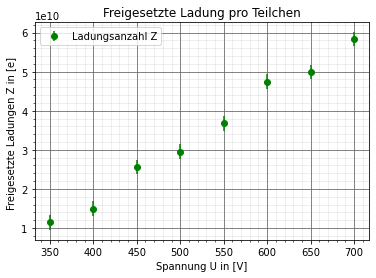

In [19]:
#berechnung der Ladung pro einfallendem Teilchen
Spannung=np.genfromtxt('Zaehlrohrstrom.dat', usecols=(0))
StromR=np.genfromtxt('Zaehlrohrstrom.dat', usecols=(1))
Strom=X*len(StromR)
k=0
while k<len(StromR):
    Strom[k]=ufloat(StromR[k]*1e-6,0.05*1e-6)
    k=k+1

e=ufloat(1.60217646e-19,0.00000006e-19)
Z=X*len(StromR)
l=0
m=3
while l<len(StromR):
    Z[l]=(Strom[l]*60)/(e*N[m])
    l=l+1
    m=m+5

print("Ladung pro Teilchen in e =",Z)
Zplt=X*len(Z)
n=0
while n<len(Z):
    Zplt[n]=Z[n].nominal_value
    n=n+1
Zerr=X*len(Z)
o=0
while o<len(Z):
    Zerr[o]=Z[o].std_dev
    o=o+1


plt.errorbar(Spannung ,Zplt, yerr=Zerr, fmt='go', label='Ladungsanzahl Z')
plt.title('Freigesetzte Ladung pro Teilchen')
plt.xlabel('Spannung U in [V]')
plt.ylabel('Freigesetzte Ladungen Z in [e] ')
plt.legend(loc='best')
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.savefig('ladungproteilchen.pdf')

daten60=np.array([Spannung,
                Zplt,
                Zerr])

daten60TR=np.transpose(daten60)
np.savetxt("werteLadungTeilchen.tex",daten60TR, fmt="%2.0f", delimiter="  &   ")


In [8]:
daten50=np.array([U,
                Nr,
                Nf])

daten50TR=np.transpose(daten50)
np.savetxt("werteSpannungTeilchen.tex",daten50TR, fmt="%2.0f", delimiter="  &   ")